<a href="https://colab.research.google.com/github/ValeriiYermak/DataScience/blob/main/HW_10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split

In [2]:
# Завантаження та підготовка даних
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Масштабування даних
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

In [4]:
# Convert 1-channel images to 3-channel
x_train = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_train))
x_test = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_test))

In [5]:
# Resize images to 32x32
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

In [6]:
# Convert tensors to NumPy arrays
x_train = x_train.numpy()
x_test = x_test.numpy()

In [7]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Load VGG16 base model
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 1s 0us/step


In [8]:
# Freeze the layers of VGG16
for layer in vgg16_base.layers:
    layer.trainable = False

In [9]:
# Define the model
model = Sequential()
model.add(vgg16_base)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [10]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [12]:
# Train the model without data augmentation
history = model.fit(x_train, y_train,
                    epochs=40,
                    validation_data=(x_val, y_val),
                    callbacks=[reduce_lr, early_stop])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/40
1500/1500 [==============================] - 24s 12ms/step - loss: 1.3557 - accuracy: 0.5441 - val_loss: 0.5959 - val_accuracy: 0.8289 - lr: 1.0000e-04
Epoch 2/40
1500/1500 [==============================] - 15s 10ms/step - loss: 0.6445 - accuracy: 0.7959 - val_loss: 0.3481 - val_accuracy: 0.8963 - lr: 1.0000e-04
Epoch 3/40
1500/1500 [==============================] - 14s 10ms/step - loss: 0.4379 - accuracy: 0.8661 - val_loss: 0.2500 - val_accuracy: 0.9262 - lr: 1.0000e-04
Epoch 4/40
1500/1500 [==============================] - 19s 12ms/step - loss: 0.3410 - accuracy: 0.8969 - val_loss: 0.2062 - val_accuracy: 0.9372 - lr: 1.0000e-04
Epoch 5/40
1500/1500 [==============================] - 17s 12ms/step - loss: 0.2888 - accuracy: 0.9133 - val_loss: 0.1789 - val_accuracy: 0.9447 - lr: 1.0000e-04
Epoch 6/40
1500/1500 [==============================] - 17s 12ms/step - loss: 0.2557 - accuracy: 0.9232 - val_loss: 0.1618 - val_accuracy: 0.9481 - lr: 1.0000e-04
Epoch 7/40
1500/1500 [

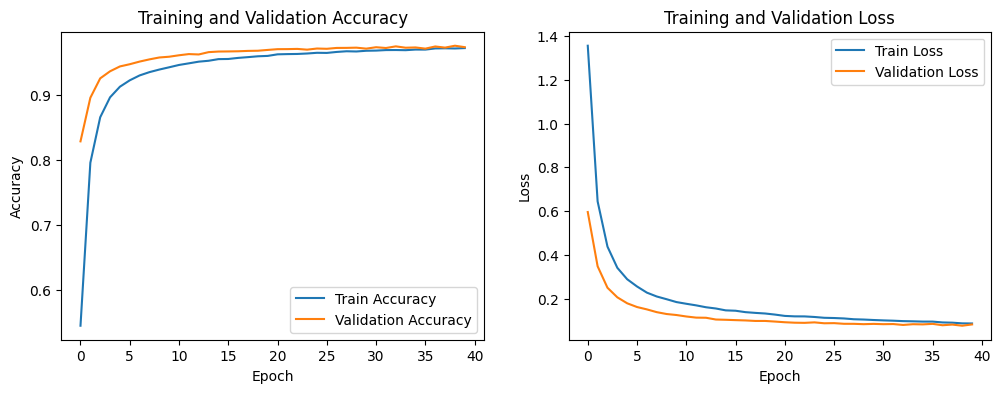

In [14]:
import matplotlib.pyplot as plt


# Побудова графіків для точності
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Побудова графіків для втрат
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Висновки:**

- Точність моделі: Після 40 епох тренування, модель досягла тестової точності 97.72%. Це дуже хороший результат для класифікації зображень з набору даних MNIST.

- Навчання та валідація: З плином епох, валідаційна точність поступово збільшувалася, а втрата зменшувалася, що свідчить про стабільне навчання без значного перенавчання.

- Підхід до навчання: Використання попередньо навченої моделі VGG16 для екстракції ознак, а потім навчання додаткових шарів для класифікації дозволило досягти високої точності на відносно невеликому наборі даних.


**Рекомендації**

- Додаткові епохи: Можна спробувати тренувати модель більше 40 епох, щоб побачити, чи можливо ще більше покращити результати.

- Зміна навчальної швидкості: Можна експериментувати з іншими значеннями швидкості навчання та схемами її зміни.

- Регуляризація: Якщо б з'явилися ознаки перенавчання, варто розглянути додаткові методи регуляризації, такі як L2-регуляризація чи збільшення коефіцієнта дропауту.

- Аугментація даних: Для подальшого покращення генералізації, можна спробувати додати аугментацію даних, що може збільшити розмір і різноманітність тренувального набору даних.